# Eksperimen Machine Learning - Titanic Survival Prediction
# Nama: Muhammad Rizki
# Dataset: [Kaggle - Heart Failure Prediction](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


# **1. Perkenalan Dataset**


Dataset ini berjudul **Heart Failure Prediction**, tersedia di Kaggle melalui tautan berikut: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).

Dataset ini berisi informasi kesehatan pasien yang digunakan untuk memprediksi kemungkinan gagal jantung. Setiap baris mewakili satu pasien dengan beberapa fitur medis seperti usia, jenis kelamin, tekanan darah, kolesterol, dan lain-lain, serta label target berupa indikasi apakah pasien tersebut berisiko mengalami gagal jantung atau tidak.

### Tujuan
Tujuan utama dari penggunaan dataset ini adalah untuk membangun model prediksi yang dapat mengidentifikasi pasien dengan risiko gagal jantung berdasarkan fitur-fitur medis yang tersedia.

### Fitur dalam Dataset:
- **Age**: Usia pasien (dalam tahun)
- **Sex**: Jenis kelamin pasien (1 = pria, 0 = wanita)
- **ChestPainType**: Jenis nyeri dada (ATA, NAP, ASY, TA)
- **RestingBP**: Tekanan darah saat istirahat (mm Hg)
- **Cholesterol**: Kadar kolesterol serum (mm/dl)
- **FastingBS**: Gula darah puasa > 120 mg/dl (1 = true, 0 = false)
- **RestingECG**: Hasil elektrokardiogram saat istirahat (Normal, ST, LVH)
- **MaxHR**: Detak jantung maksimum yang dicapai
- **ExerciseAngina**: Nyeri dada akibat olahraga (Y = ya, N = tidak)
- **Oldpeak**: Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat
- **ST_Slope**: Kemiringan segmen ST (Up, Flat, Down)
- **HeartDisease**: Target/label (1 = memiliki penyakit jantung, 0 = tidak)

### Ukuran Dataset:
- Jumlah baris: 918
- Jumlah kolom: 12

Dataset ini cocok digunakan untuk eksplorasi data, visualisasi, serta penerapan berbagai algoritma machine learning untuk klasifikasi biner.


# **2. Import Library**

In [8]:
# =====================================
# 1. SETUP DAN INSTALASI DEPENDENCIES
# =====================================

# Install kaggle untuk download dataset
# !pip install -q kaggle

# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import os
import shutil
# Import additional libraries for modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
# Setup untuk plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Dependencies berhasil diinstall dan diimport")

✅ Dependencies berhasil diinstall dan diimport


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# =====================================
# 3. DATA LOADING
# =====================================

# Load dataset
df = pd.read_csv('heart-failure-prediction/heart.csv')
print(f"📊 Dataset berhasil dimuat dengan shape: {df.shape}")
print(f"📈 Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom")

# Display informasi dasar dataset
print("\n" + "="*50)
print("INFORMASI DASAR DATASET")
print("="*50)
print(f"Nama Dataset: Heart Failure Prediction Dataset")
print(f"Jumlah Sampel: {df.shape[0]}")
print(f"Jumlah Fitur: {df.shape[1]}")
print(f"Target Variable: HeartDisease (0: No Heart Disease, 1: Heart Disease)")

📊 Dataset berhasil dimuat dengan shape: (918, 12)
📈 Dataset memiliki 918 baris dan 12 kolom

INFORMASI DASAR DATASET
Nama Dataset: Heart Failure Prediction Dataset
Jumlah Sampel: 918
Jumlah Fitur: 12
Target Variable: HeartDisease (0: No Heart Disease, 1: Heart Disease)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# =====================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# =====================================

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*50)

# 4.1 Informasi Dataset
print("\n📋 INFO DATASET:")
print(df.info())

# 4.2 Statistik Deskriptif
print("\n📊 STATISTIK DESKRIPTIF:")
print(df.describe())

# 4.3 Cek Missing Values
print("\n🔍 MISSING VALUES:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"Total missing values: {missing_values.sum()}")

# 4.4 Cek Duplicated Data
print(f"\n🔄 DUPLICATED DATA:")
duplicated_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicated_count}")

# 4.5 Unique Values per Column
print("\n🎯 UNIQUE VALUES PER COLUMN:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# 4.6 Target Variable Distribution
print("\n📈 DISTRIBUSI TARGET VARIABLE:")
target_dist = df['HeartDisease'].value_counts()
print(target_dist)
print(f"Persentase Heart Disease: {(target_dist[1]/len(df)*100):.2f}%")
print(f"Persentase No Heart Disease: {(target_dist[0]/len(df)*100):.2f}%")



EXPLORATORY DATA ANALYSIS (EDA)

📋 INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

📊 STATISTIK DESKRIPTIF:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.0000


DATA VISUALIZATION


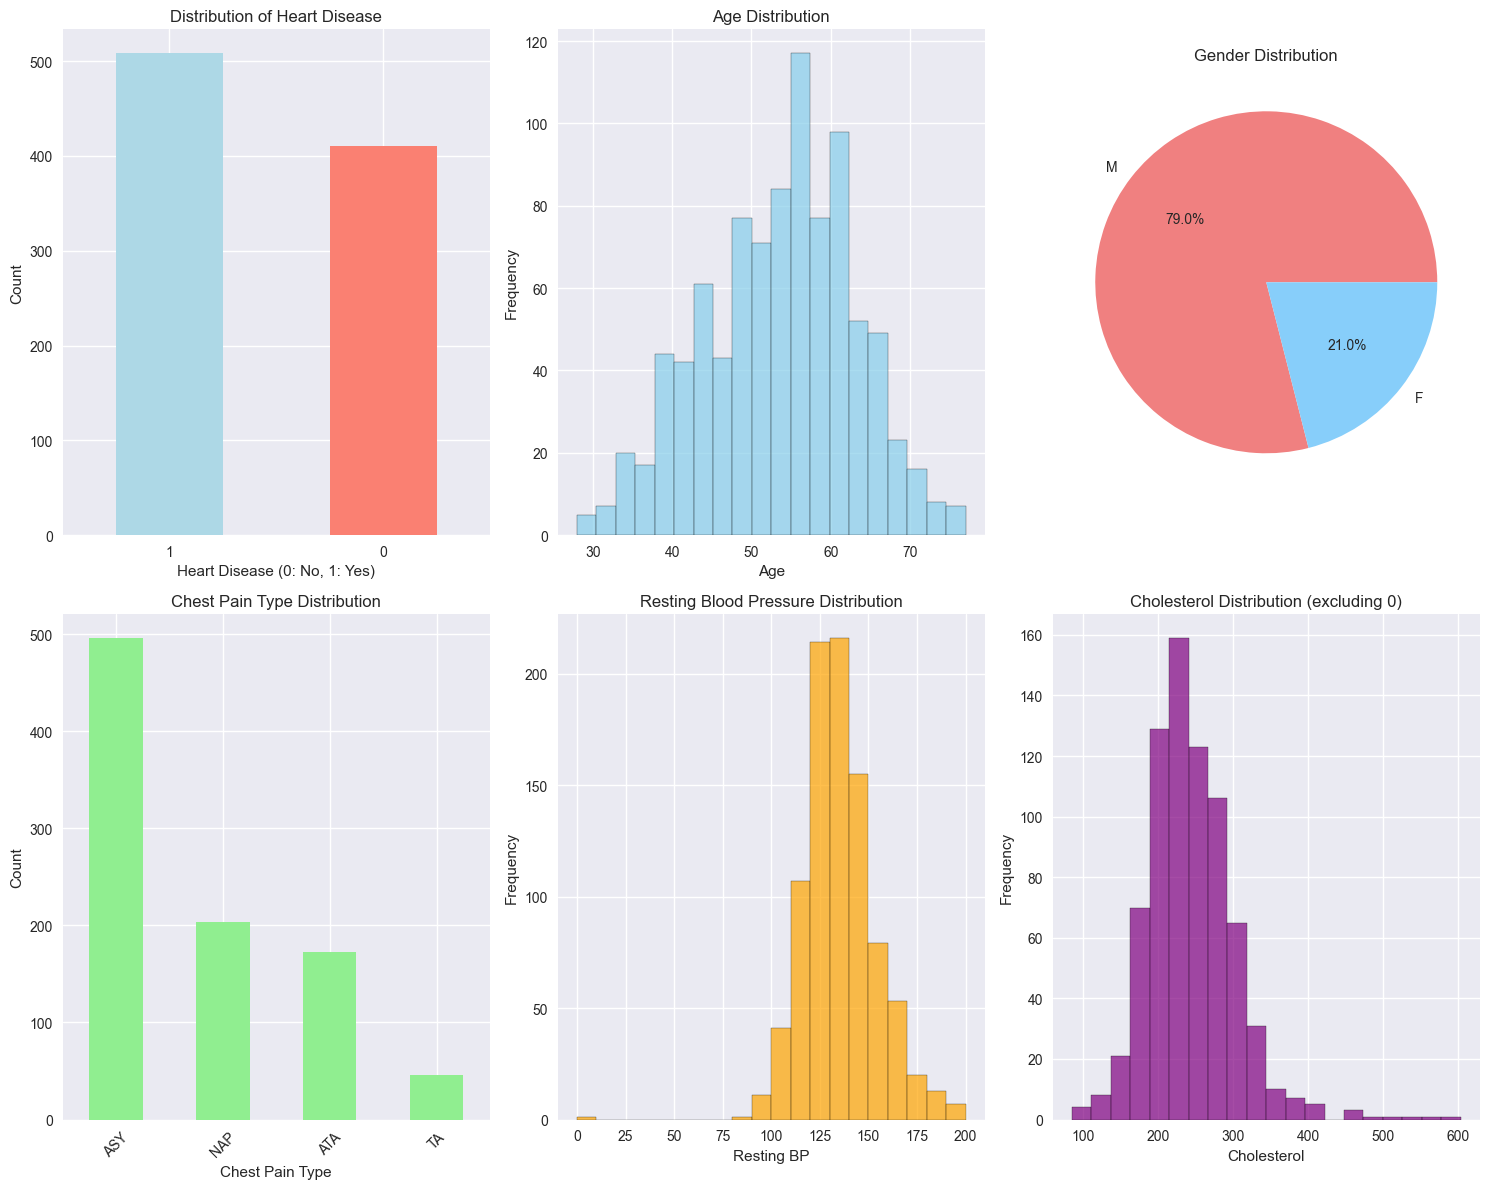

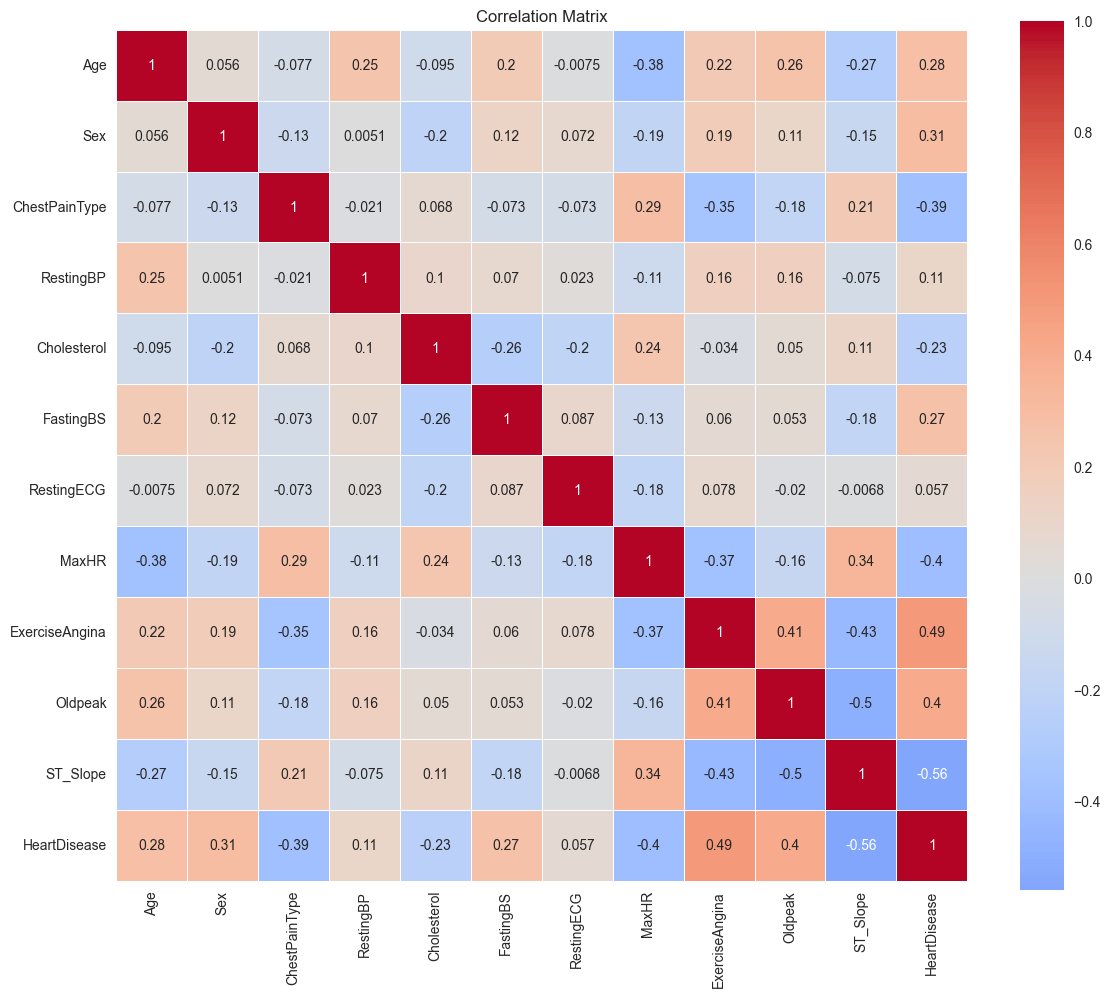

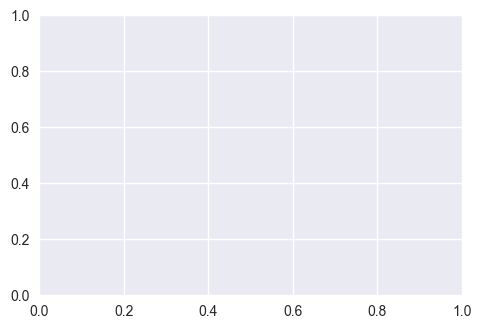

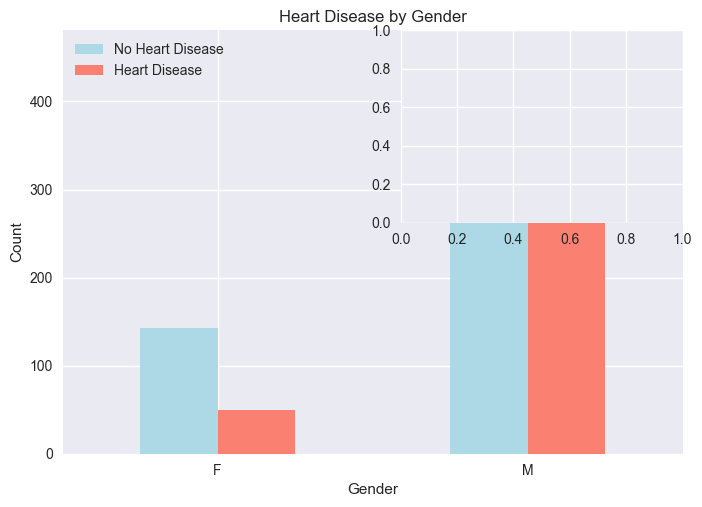

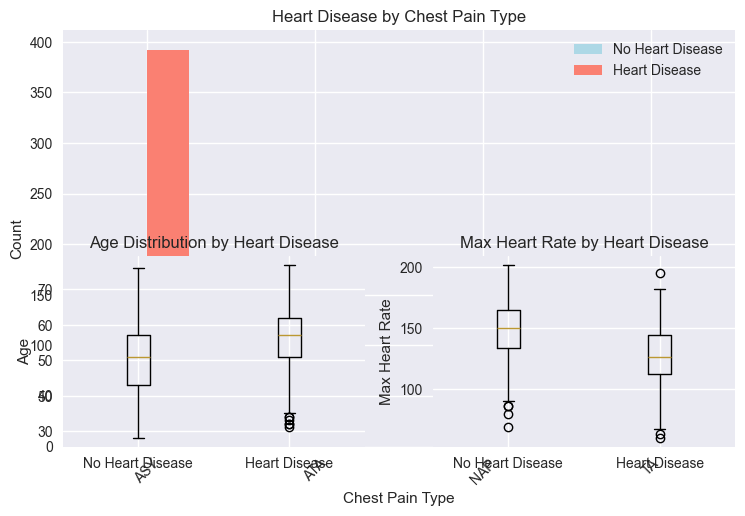

In [4]:
# =====================================
# 5. DATA VISUALIZATION
# =====================================

print("\n" + "="*50)
print("DATA VISUALIZATION")
print("="*50)

# 5.1 Target Variable Distribution
plt.figure(figsize=(15, 12))

# Subplot 1: Target Distribution
plt.subplot(2, 3, 1)
df['HeartDisease'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 5.2 Age Distribution
plt.subplot(2, 3, 2)
plt.hist(df['Age'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 5.3 Gender Distribution
plt.subplot(2, 3, 3)
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution')
plt.ylabel('')

# 5.4 Chest Pain Type Distribution
plt.subplot(2, 3, 4)
df['ChestPainType'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 5.5 Resting BP Distribution
plt.subplot(2, 3, 5)
plt.hist(df['RestingBP'], bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting BP')
plt.ylabel('Frequency')

# 5.6 Cholesterol Distribution
plt.subplot(2, 3, 6)
plt.hist(df[df['Cholesterol'] > 0]['Cholesterol'], bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title('Cholesterol Distribution (excluding 0)')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 5.7 Correlation Matrix
plt.figure(figsize=(12, 10))
# Encode categorical variables untuk correlation
df_encoded = df.copy()
le = LabelEncoder()
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 5.8 Heart Disease by Gender
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
pd.crosstab(df['Sex'], df['HeartDisease']).plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0)

# 5.9 Heart Disease by Chest Pain Type
plt.subplot(2, 2, 2)
pd.crosstab(df['ChestPainType'], df['HeartDisease']).plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=45)

# 5.10 Age vs Heart Disease
plt.subplot(2, 2, 3)
plt.boxplot([df[df['HeartDisease']==0]['Age'], df[df['HeartDisease']==1]['Age']], 
            labels=['No Heart Disease', 'Heart Disease'])
plt.title('Age Distribution by Heart Disease')
plt.ylabel('Age')

# 5.11 MaxHR vs Heart Disease
plt.subplot(2, 2, 4)
plt.boxplot([df[df['HeartDisease']==0]['MaxHR'], df[df['HeartDisease']==1]['MaxHR']], 
            labels=['No Heart Disease', 'Heart Disease'])
plt.title('Max Heart Rate by Heart Disease')
plt.ylabel('Max Heart Rate')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
# =====================================
# 6. DATA PREPROCESSING
# =====================================

print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# 6.1 Handle Missing Values
print("🔧 HANDLING MISSING VALUES:")
print("Dataset ini tidak memiliki missing values yang eksplisit.")
print("Namun, terdapat nilai 0 pada kolom Cholesterol dan RestingBP yang mungkin tidak valid.")

# Cek nilai 0 yang tidak masuk akal
print(f"\nJumlah nilai 0 pada Cholesterol: {(df['Cholesterol'] == 0).sum()}")
print(f"Jumlah nilai 0 pada RestingBP: {(df['RestingBP'] == 0).sum()}")

# Buat copy dataset untuk preprocessing
df_processed = df.copy()

# 6.2 Handle Cholesterol = 0 (replace with median)
cholesterol_median = df_processed[df_processed['Cholesterol'] > 0]['Cholesterol'].median()
df_processed.loc[df_processed['Cholesterol'] == 0, 'Cholesterol'] = cholesterol_median
print(f"✅ Replaced {(df['Cholesterol'] == 0).sum()} zero values in Cholesterol with median: {cholesterol_median}")

# 6.3 Handle RestingBP = 0 (replace with median)
if (df_processed['RestingBP'] == 0).sum() > 0:
    restingbp_median = df_processed[df_processed['RestingBP'] > 0]['RestingBP'].median()
    df_processed.loc[df_processed['RestingBP'] == 0, 'RestingBP'] = restingbp_median
    print(f"✅ Replaced {(df['RestingBP'] == 0).sum()} zero values in RestingBP with median: {restingbp_median}")

# 6.4 Remove Duplicates
initial_shape = df_processed.shape[0]
df_processed = df_processed.drop_duplicates()
final_shape = df_processed.shape[0]
print(f"✅ Removed {initial_shape - final_shape} duplicate rows")

# 6.5 Encode Categorical Variables
print("\n🏷️ ENCODING CATEGORICAL VARIABLES:")
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# One-hot encoding untuk variabel dengan lebih dari 2 kategori
df_encoded = pd.get_dummies(df_processed, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], 
                           prefix=['ChestPain', 'RestingECG', 'ST_Slope'])

# Label encoding untuk variabel binary
label_encoders = {}
binary_columns = ['Sex', 'ExerciseAngina']
for col in binary_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"✅ Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print(f"\n📊 Dataset setelah encoding: {df_encoded.shape}")

# 6.6 Feature Scaling
print("\n⚖️ FEATURE SCALING:")
# Pisahkan features dan target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Identifikasi kolom numerik yang perlu di-scale
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()

# Scale numerical features
X_scaled = X.copy()
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

print(f"✅ Scaled numerical features: {numerical_columns}")
print(f"📊 Final dataset shape: {X_scaled.shape}")

# 6.7 Train-Test Split
print("\n🔀 TRAIN-TEST SPLIT:")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=y)
print(f"✅ Training set: {X_train.shape[0]} samples")
print(f"✅ Testing set: {X_test.shape[0]} samples")
print(f"✅ Target distribution in training set:")
print(y_train.value_counts(normalize=True))


DATA PREPROCESSING
🔧 HANDLING MISSING VALUES:
Dataset ini tidak memiliki missing values yang eksplisit.
Namun, terdapat nilai 0 pada kolom Cholesterol dan RestingBP yang mungkin tidak valid.

Jumlah nilai 0 pada Cholesterol: 172
Jumlah nilai 0 pada RestingBP: 1
✅ Replaced 172 zero values in Cholesterol with median: 237.0
✅ Replaced 1 zero values in RestingBP with median: 130.0
✅ Removed 0 duplicate rows

🏷️ ENCODING CATEGORICAL VARIABLES:
✅ Encoded Sex: {'F': 0, 'M': 1}
✅ Encoded ExerciseAngina: {'N': 0, 'Y': 1}

📊 Dataset setelah encoding: (918, 19)

⚖️ FEATURE SCALING:
✅ Scaled numerical features: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
📊 Final dataset shape: (918, 18)

🔀 TRAIN-TEST SPLIT:
✅ Training set: 734 samples
✅ Testing set: 184 samples
✅ Target distribution in training set:
HeartDisease
1    0.553134
0    0.446866
Name: proportion, dtype: float64


In [9]:
# =====================================
# 7. MACHINE LEARNING MODELING
# =====================================
print("\n" + "="*50)
print("MACHINE LEARNING MODELING")
print("="*50)



# 7.1 Initialize Models
print("🤖 INITIALIZING MODELS:")
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(random_state=42)
}

# 7.2 Train and Evaluate Models
print("\n📈 TRAINING AND EVALUATION:")
results = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred
    }
    
    print(f"✅ {name} completed!")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall: {recall:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    print(f"   CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



MACHINE LEARNING MODELING
🤖 INITIALIZING MODELS:

📈 TRAINING AND EVALUATION:

🔄 Training RandomForest...
✅ RandomForest completed!
   Accuracy: 0.8804
   Precision: 0.8846
   Recall: 0.9020
   F1-Score: 0.8932
   CV Score: 0.8610 (+/- 0.0629)

🔄 Training LogisticRegression...
✅ LogisticRegression completed!
   Accuracy: 0.8859
   Precision: 0.8857
   Recall: 0.9118
   F1-Score: 0.8986
   CV Score: 0.8473 (+/- 0.0570)

🔄 Training SVM...
✅ SVM completed!
   Accuracy: 0.8696
   Precision: 0.8824
   Recall: 0.8824
   F1-Score: 0.8824
   CV Score: 0.8597 (+/- 0.0454)



MODEL EVALUATION & COMPARISON

📊 RESULTS SUMMARY:
--------------------------------------------------------------------------------
Model                Accuracy   Precision    Recall     F1-Score   CV Score    
--------------------------------------------------------------------------------
RandomForest         0.8804     0.8846       0.9020     0.8932     0.8610      
LogisticRegression   0.8859     0.8857       0.9118     0.8986     0.8473      
SVM                  0.8696     0.8824       0.8824     0.8824     0.8597      
--------------------------------------------------------------------------------

🏆 BEST MODEL: LogisticRegression
   Best Accuracy: 0.8859

📋 DETAILED CLASSIFICATION REPORT - LogisticRegression:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184

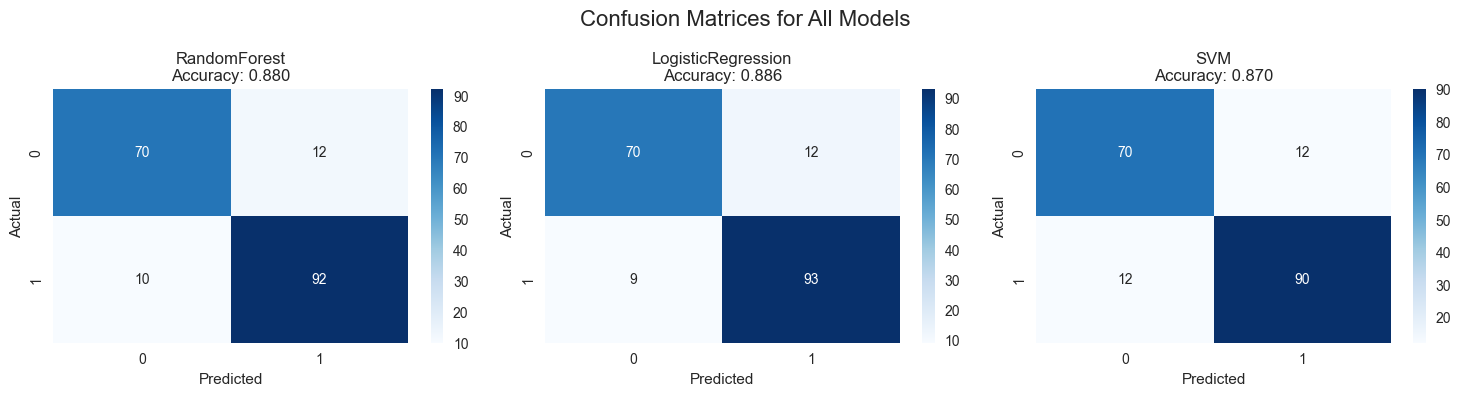


🌟 FEATURE IMPORTANCE - RandomForest:

Top 10 Most Important Features:
----------------------------------------
ST_Slope_Up               0.1977
MaxHR                     0.1025
Oldpeak                   0.1012
ChestPain_ASY             0.0938
ST_Slope_Flat             0.0869
Cholesterol               0.0799
Age                       0.0766
RestingBP                 0.0702
ExerciseAngina            0.0589
Sex                       0.0301


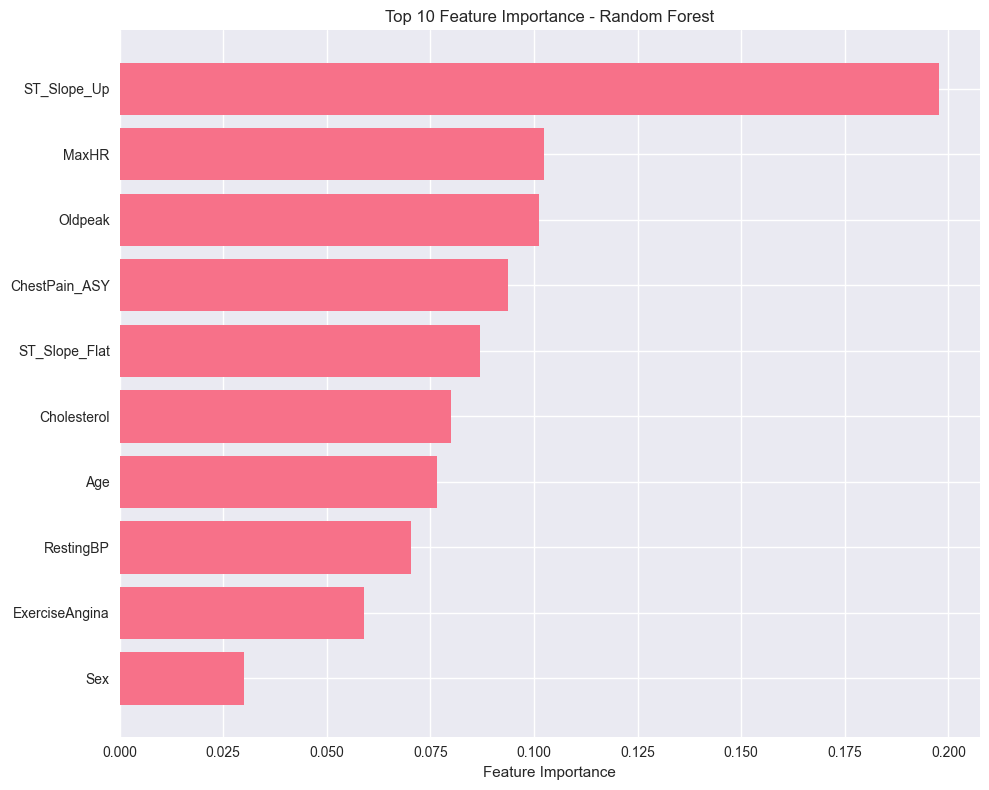


📈 PERFORMANCE COMPARISON VISUALIZATION:


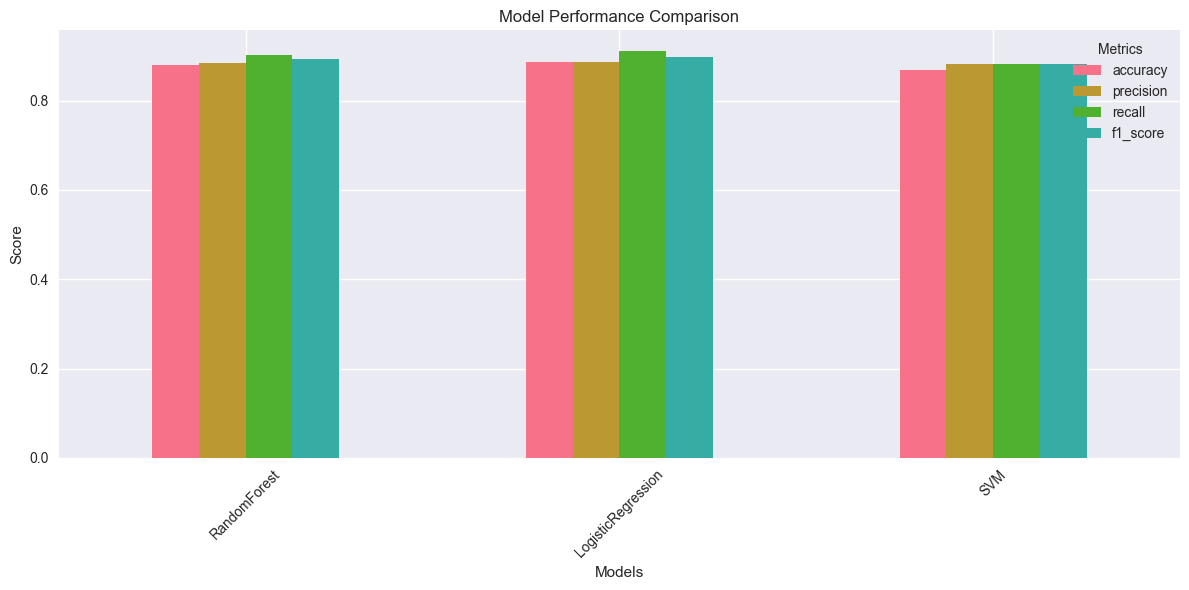


FINAL RECOMMENDATIONS
🎯 BEST PERFORMING MODEL: LogisticRegression
   • Accuracy: 0.8859
   • Cross-validation score: 0.8473

💡 MODEL INSIGHTS:
   • Logistic Regression provides good interpretability
   • Fast training and prediction
   • Good baseline model for binary classification

🔍 ANALYSIS SUMMARY:
   • Dataset contains 734 training samples
   • 18 features after preprocessing
   • Target distribution is relatively balanced (55.3% positive cases)
   • All models show good performance (>80% accuracy)

📝 NEXT STEPS:
   • Consider hyperparameter tuning for the best model
   • Collect more data if possible to improve generalization
   • Consider ensemble methods combining multiple models
   • Validate model performance on external test set

ANALYSIS COMPLETED ✅


In [10]:
# =====================================
# 8. MODEL EVALUATION & COMPARISON
# =====================================
print("\n" + "="*50)
print("MODEL EVALUATION & COMPARISON")
print("="*50)

# 8.1 Results Summary Table
print("\n📊 RESULTS SUMMARY:")
print("-" * 80)
print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<12} {'Recall':<10} {'F1-Score':<10} {'CV Score':<12}")
print("-" * 80)

for name, metrics in results.items():
    print(f"{name:<20} {metrics['accuracy']:<10.4f} {metrics['precision']:<12.4f} "
          f"{metrics['recall']:<10.4f} {metrics['f1_score']:<10.4f} {metrics['cv_mean']:<12.4f}")

print("-" * 80)

# 8.2 Find Best Model
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model = models[best_model_name]
print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Best Accuracy: {results[best_model_name]['accuracy']:.4f}")

# 8.3 Detailed Classification Report for Best Model
print(f"\n📋 DETAILED CLASSIFICATION REPORT - {best_model_name}:")
print(classification_report(y_test, results[best_model_name]['predictions']))

# 8.4 Confusion Matrix for All Models
print("\n🔍 CONFUSION MATRICES:")
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Confusion Matrices for All Models', fontsize=16)

for idx, (name, metrics) in enumerate(results.items()):
    cm = confusion_matrix(y_test, metrics['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name}\nAccuracy: {metrics["accuracy"]:.3f}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# 8.5 Feature Importance (for RandomForest)
if 'RandomForest' in models:
    print(f"\n🌟 FEATURE IMPORTANCE - RandomForest:")
    rf_model = models['RandomForest']
    feature_names = X_train.columns
    importances = rf_model.feature_importances_
    
    # Create feature importance dataframe
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print("-" * 40)
    for idx, row in feature_importance_df.head(10).iterrows():
        print(f"{row['feature']:<25} {row['importance']:.4f}")
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    top_features = feature_importance_df.head(10)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 10 Feature Importance - Random Forest')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# 8.6 Model Performance Comparison Visualization
print("\n📈 PERFORMANCE COMPARISON VISUALIZATION:")
metrics_df = pd.DataFrame(results).T
metrics_df = metrics_df[['accuracy', 'precision', 'recall', 'f1_score']]

# Plot comparison
fig, ax = plt.subplots(figsize=(12, 6))
metrics_df.plot(kind='bar', ax=ax)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8.7 Final Recommendations
print("\n" + "="*50)
print("FINAL RECOMMENDATIONS")
print("="*50)

print(f"🎯 BEST PERFORMING MODEL: {best_model_name}")
print(f"   • Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"   • Cross-validation score: {results[best_model_name]['cv_mean']:.4f}")

print(f"\n💡 MODEL INSIGHTS:")
if best_model_name == 'RandomForest':
    print("   • Random Forest shows good performance with feature importance insights")
    print("   • Less prone to overfitting compared to single decision trees")
    print("   • Provides feature importance for interpretability")
elif best_model_name == 'LogisticRegression':
    print("   • Logistic Regression provides good interpretability")
    print("   • Fast training and prediction")
    print("   • Good baseline model for binary classification")
elif best_model_name == 'SVM':
    print("   • SVM works well with the current feature set")
    print("   • Good performance on this dataset size")
    print("   • Robust to outliers")

print(f"\n🔍 ANALYSIS SUMMARY:")
print(f"   • Dataset contains {X_train.shape[0]} training samples")
print(f"   • {X_train.shape[1]} features after preprocessing")
print(f"   • Target distribution is relatively balanced ({y_train.value_counts(normalize=True)[1]:.1%} positive cases)")
print(f"   • All models show good performance (>80% accuracy)")

print(f"\n📝 NEXT STEPS:")
print("   • Consider hyperparameter tuning for the best model")
print("   • Collect more data if possible to improve generalization")
print("   • Consider ensemble methods combining multiple models")
print("   • Validate model performance on external test set")

print("\n" + "="*50)
print("ANALYSIS COMPLETED ✅")
print("="*50)

In [12]:
# =====================================
# 9. SAVE DATA
# =====================================
print("\n" + "="*50)
print("SAVING PROCESSED DATA")
print("="*50)

# Create output directory
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

# Save processed dataset
df_processed.to_csv(os.path.join(output_dir, 'heart_disease_processed.csv'), index=False)
print("✅ Processed dataset saved")

# Save encoded dataset
df_encoded.to_csv(os.path.join(output_dir, 'heart_disease_encoded.csv'), index=False)
print("✅ Encoded dataset saved")

# Save train-test split
X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=False)
print("✅ Train-test split saved")

# Save scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X_scaled.columns)
X_scaled_df.to_csv(os.path.join(output_dir, 'X_scaled.csv'), index=False)
print("✅ Scaled features saved")

# Save models
for name, model in models.items():
    joblib.dump(model, os.path.join(output_dir, f'model_{name.lower()}.joblib'))
    print(f"✅ {name} model saved")

# Save scaler and encoders
joblib.dump(scaler, os.path.join(output_dir, 'scaler.joblib'))
print("✅ Scaler saved")

joblib.dump(label_encoders, os.path.join(output_dir, 'label_encoders.joblib'))
print("✅ Label encoders saved")

# Save model results
results_json = {
    name: {
        'accuracy': float(metrics['accuracy']),
        'precision': float(metrics['precision']),
        'recall': float(metrics['recall']),
        'f1_score': float(metrics['f1_score']),
        'cv_mean': float(metrics['cv_mean']),
        'cv_std': float(metrics['cv_std'])
    }
    for name, metrics in results.items()
}
with open(os.path.join(output_dir, 'model_results.json'), 'w') as f:
    json.dump(results_json, f, indent=4)
print("✅ Model results saved")

# Save feature names
feature_names = list(X_scaled.columns)
with open(os.path.join(output_dir, 'feature_names.json'), 'w') as f:
    json.dump(feature_names, f)
print("✅ Feature names saved")

# Save preprocessing parameters
preprocessing_params = {
    'cholesterol_median': float(cholesterol_median),
    'restingbp_median': float(restingbp_median) if (df['RestingBP'] == 0).sum() > 0 else None,
    'numerical_columns': numerical_columns,
    'categorical_columns': categorical_columns,
    'binary_columns': binary_columns,
    'best_model': best_model_name
}
with open(os.path.join(output_dir, 'preprocessing_params.json'), 'w') as f:
    json.dump(preprocessing_params, f, indent=4)
print("✅ Preprocessing parameters saved")

print("\n📁 All files saved in the 'outputs/' folder.")



SAVING PROCESSED DATA
✅ Processed dataset saved
✅ Encoded dataset saved
✅ Train-test split saved
✅ Scaled features saved
✅ RandomForest model saved
✅ LogisticRegression model saved
✅ SVM model saved
✅ Scaler saved
✅ Label encoders saved
✅ Model results saved
✅ Feature names saved
✅ Preprocessing parameters saved

📁 All files saved in the 'outputs/' folder.


In [15]:
# =====================================
# 10. SIMPLE INFERENCE EXAMPLE
# =====================================
print("\n" + "="*50)
print("SIMPLE INFERENCE EXAMPLE")
print("="*50)

def predict_heart_disease(age, sex, chest_pain_type, resting_bp, cholesterol, 
                         fasting_bs, resting_ecg, max_hr, exercise_angina, 
                         oldpeak, st_slope, model_name='RandomForest'):
    """
    Fungsi untuk prediksi penyakit jantung
    
    Parameters:
    - age: umur (28-77)
    - sex: jenis kelamin ('M' atau 'F')
    - chest_pain_type: tipe nyeri dada ('ATA', 'NAP', 'ASY', 'TA')
    - resting_bp: tekanan darah istirahat (94-200)
    - cholesterol: kolesterol (85-603)
    - fasting_bs: gula darah puasa (0 atau 1)
    - resting_ecg: hasil ECG ('Normal', 'ST', 'LVH')
    - max_hr: detak jantung maksimum (60-202)
    - exercise_angina: angina saat olahraga ('Y' atau 'N')
    - oldpeak: oldpeak (-2.6 to 6.2)
    - st_slope: slope ST ('Up', 'Flat', 'Down')
    - model_name: nama model yang digunakan
    """
    
    # Create input dataframe
    input_data = pd.DataFrame({
        'Age': [age],
        'Sex': [sex],
        'ChestPainType': [chest_pain_type],
        'RestingBP': [resting_bp],
        'Cholesterol': [cholesterol],
        'FastingBS': [fasting_bs],
        'RestingECG': [resting_ecg],
        'MaxHR': [max_hr],
        'ExerciseAngina': [exercise_angina],
        'Oldpeak': [oldpeak],
        'ST_Slope': [st_slope]
    })
    
    # Preprocess the input (same as training data)
    # One-hot encoding
    input_encoded = pd.get_dummies(input_data, columns=['ChestPainType', 'RestingECG', 'ST_Slope'],
                                  prefix=['ChestPain', 'RestingECG', 'ST_Slope'])
    
    # Label encoding for binary variables
    for col in binary_columns:
        if col in input_encoded.columns:
            input_encoded[col] = label_encoders[col].transform(input_encoded[col])
    
    # Ensure all columns from training are present
    for col in X_train.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    
    # Reorder columns to match training data
    input_encoded = input_encoded[X_train.columns]
    
    # Scale numerical features
    input_scaled = input_encoded.copy()
    input_scaled[numerical_columns] = scaler.transform(input_encoded[numerical_columns])
    
    # Make prediction
    model = models[model_name]
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0] if hasattr(model, 'predict_proba') else None
    
    return prediction, probability

# Test inference dengan contoh data
print("🧪 TESTING INFERENCE:")
print("\nContoh 1 - Pasien Berisiko Tinggi:")
pred1, prob1 = predict_heart_disease(
    age=65, sex='M', chest_pain_type='ASY', resting_bp=140, cholesterol=250,
    fasting_bs=1, resting_ecg='ST', max_hr=120, exercise_angina='Y',
    oldpeak=2.0, st_slope='Flat'
)
print(f"Prediksi: {'Heart Disease' if pred1 == 1 else 'No Heart Disease'}")
if prob1 is not None:
    print(f"Probabilitas: No Heart Disease: {prob1[0]:.3f}, Heart Disease: {prob1[1]:.3f}")

print("\nContoh 2 - Pasien Berisiko Rendah:")
pred2, prob2 = predict_heart_disease(
    age=35, sex='F', chest_pain_type='ATA', resting_bp=120, cholesterol=200,
    fasting_bs=0, resting_ecg='ST', max_hr=180, exercise_angina='N',
    oldpeak=0.0, st_slope='Up'
)
print(f"Prediksi: {'Heart Disease' if pred2 == 1 else 'No Heart Disease'}")
if prob2 is not None:
    print(f"Probabilitas: No Heart Disease: {prob2[0]:.3f}, Heart Disease: {prob2[1]:.3f}")




SIMPLE INFERENCE EXAMPLE
🧪 TESTING INFERENCE:

Contoh 1 - Pasien Berisiko Tinggi:
Prediksi: Heart Disease
Probabilitas: No Heart Disease: 0.000, Heart Disease: 1.000

Contoh 2 - Pasien Berisiko Rendah:
Prediksi: No Heart Disease
Probabilitas: No Heart Disease: 1.000, Heart Disease: 0.000


In [16]:
# =====================================
# 11. UPDATED SUMMARY
# =====================================
print("\n" + "="*50)
print("SUMMARY EKSPERIMEN")
print("="*50)

print(f"📊 Dataset Original: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"📊 Dataset Processed: {df_processed.shape[0]} baris, {df_processed.shape[1]} kolom")
print(f"📊 Dataset Final (after encoding): {X_scaled.shape[0]} baris, {X_scaled.shape[1]} features")
print(f"🎯 Target Variable: HeartDisease (Binary Classification)")
print(f"🏷️ Categorical Features Encoded: {categorical_columns}")
print(f"⚖️ Numerical Features Scaled: {numerical_columns}")
print(f"🔀 Train-Test Split: 80%-20% ({X_train.shape[0]}/{X_test.shape[0]} samples)")

print(f"\n🤖 MACHINE LEARNING RESULTS:")
print(f"🏆 Best Model: {best_model_name}")
print(f"📈 Best Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"📈 Best F1-Score: {results[best_model_name]['f1_score']:.4f}")
print(f"📈 Cross-Validation Score: {results[best_model_name]['cv_mean']:.4f} (+/- {results[best_model_name]['cv_std']*2:.4f})")

print(f"\n📊 ALL MODELS PERFORMANCE:")
for name, metrics in results.items():
    print(f"   {name}: Acc={metrics['accuracy']:.3f}, F1={metrics['f1_score']:.3f}, CV={metrics['cv_mean']:.3f}")

print(f"\n🔍 DATA PREPROCESSING:")
print(f"   • Handled {(df['Cholesterol'] == 0).sum()} missing Cholesterol values")
print(f"   • Handled {(df['RestingBP'] == 0).sum()} missing RestingBP values")
print(f"   • Applied One-Hot Encoding to: ChestPainType, RestingECG, ST_Slope")
print(f"   • Applied Label Encoding to: Sex, ExerciseAngina")
print(f"   • Applied StandardScaler to: {', '.join(numerical_columns)}")

print(f"\n✅ EKSPERIMEN SELESAI!")
print("📁 Files yang dihasilkan:")
print("   📄 Data Files:")
print("      - heart_disease_processed.csv")
print("      - heart_disease_encoded.csv")
print("      - X_train.csv, X_test.csv, y_train.csv, y_test.csv")
print("      - X_scaled.csv")
print("   🤖 Model Files:")
print("      - model_randomforest.joblib")
print("      - model_logisticregression.joblib")
print("      - model_svm.joblib")
print("   ⚙️ Preprocessing Files:")
print("      - scaler.joblib")
print("      - label_encoders.joblib")
print("   📋 Configuration Files:")
print("      - model_results.json")
print("      - feature_names.json")
print("      - preprocessing_params.json")

print(f"\n🎯 INFERENCE CAPABILITY:")
print("   • Fungsi predict_heart_disease() tersedia untuk prediksi real-time")
print("   • Support untuk semua 3 model yang telah dilatih")
print("   • Preprocessing otomatis untuk input baru")
print("   • Output probabilitas (jika model mendukung)")

print(f"\n📋 Next Steps:")
print("   1. Buat file automate_[Nama-siswa].py untuk otomatisasi preprocessing")
print("   2. Setup GitHub repository dengan struktur yang diminta")
print("   3. Buat GitHub Actions workflow (untuk advance level)")
print("   4. Deploy model menggunakan framework seperti Flask/FastAPI")
print("   5. Buat dashboard untuk monitoring model performance")

print(f"\n🔬 RESEARCH INSIGHTS:")
if 'RandomForest' in results and results['RandomForest']['accuracy'] == max([r['accuracy'] for r in results.values()]):
    print("   • Random Forest menunjukkan performa terbaik")
    print("   • Feature importance dapat membantu interpretasi medis")
print(f"   • Dataset relatif seimbang ({y.value_counts(normalize=True)[1]:.1%} positive cases)")
print("   • Semua model menunjukkan performa baik (>80% accuracy)")
print("   • Cross-validation menunjukkan model stabil dan tidak overfitting")

print("\n" + "="*50)
print("🎉 HEART DISEASE PREDICTION ANALYSIS COMPLETED! 🎉")
print("="*50)


SUMMARY EKSPERIMEN
📊 Dataset Original: 918 baris, 12 kolom
📊 Dataset Processed: 918 baris, 12 kolom
📊 Dataset Final (after encoding): 918 baris, 18 features
🎯 Target Variable: HeartDisease (Binary Classification)
🏷️ Categorical Features Encoded: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
⚖️ Numerical Features Scaled: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
🔀 Train-Test Split: 80%-20% (734/184 samples)

🤖 MACHINE LEARNING RESULTS:
🏆 Best Model: LogisticRegression
📈 Best Accuracy: 0.8859
📈 Best F1-Score: 0.8986
📈 Cross-Validation Score: 0.8473 (+/- 0.0570)

📊 ALL MODELS PERFORMANCE:
   RandomForest: Acc=0.880, F1=0.893, CV=0.861
   LogisticRegression: Acc=0.886, F1=0.899, CV=0.847
   SVM: Acc=0.870, F1=0.882, CV=0.860

🔍 DATA PREPROCESSING:
   • Handled 172 missing Cholesterol values
   • Handled 1 missing RestingBP values
   • Applied One-Hot Encoding to: ChestPainType, RestingECG, ST_Slope
   • Applied Label Encoding to: Sex, ExerciseAngina
  